In [972]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [973]:
# Reading dataset from file
ds = pd.read_csv('Covid.csv')
ds

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [974]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (58, 18)
Shape of dataset after removing duplicates:  (58, 18)


In [975]:
ds.shape

(58, 18)

In [976]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [977]:
# Checking columns of dataset
ds.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [978]:
# data types of columns
ds.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [979]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [980]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [981]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], dtype='object')

# Checking the unique values of columns of dataset

In [982]:
ds['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [983]:
ds['Country_Region'].unique()

array(['US'], dtype=object)

In [984]:
ds['Last_Update'].unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [985]:
ds['Lat'].unique()

array([ 32.3182,  61.3707, -14.271 ,  33.7298,  34.9697,  36.1162,
        39.0598,  41.5978,  39.3185,      nan,  38.8974,  27.7663,
        33.0406,  13.4443,  21.0943,  44.2405,  40.3495,  39.8494,
        42.0115,  38.5266,  37.6681,  31.1695,  44.6939,  39.0639,
        42.2302,  43.3266,  45.6945,  32.7416,  38.4561,  46.9219,
        41.1254,  38.3135,  43.4525,  40.2989,  34.8405,  42.1657,
        35.6301,  47.5289,  15.0979,  40.3888,  35.5653,  44.572 ,
        40.5908,  18.2208,  41.6809,  33.8569,  44.2998,  35.7478,
        31.0545,  40.15  ,  44.0459,  18.3358,  37.7693,  47.4009,
        38.4912,  44.2685,  42.756 ])

In [986]:
ds['Long_'].unique()

array([ -86.9023, -152.4044, -170.132 , -111.4312,  -92.3731, -119.6816,
       -105.3111,  -72.7554,  -75.5071,       nan,  -77.0268,  -81.6868,
        -83.6431,  144.7937, -157.4983, -114.4788,  -88.9861,  -86.2583,
        -93.2105,  -96.7265,  -84.6701,  -91.8678,  -69.3819,  -76.8021,
        -71.5301,  -84.5361,  -93.9002,  -89.6787,  -92.2884, -110.4544,
        -98.2681, -117.0554,  -71.5639,  -74.521 , -106.2485,  -74.9481,
        -79.8064,  -99.784 ,  145.6739,  -82.7649,  -96.9289, -122.0709,
        -77.2098,  -66.5901,  -71.5118,  -80.945 ,  -99.4388,  -86.6923,
        -97.5635, -111.8624,  -72.7107,  -64.8963,  -78.17  , -121.4905,
        -80.9545,  -89.6165, -107.3025])

In [987]:
ds['Confirmed'].unique()

array([ 13052,    401,      0,  14906,   5003,  85997,  22797,  39017,
         8194,     49,   7551,  47471,  39801,    103,    154,    643,
         2506, 100418,  29274,  15620,   8507,   8167,  35316,   1819,
        42323,  88970,  53009,  17670,  11967,  11528,    478,  11122,
         7388,   3868, 150776,   6317, 354370,  20262,   2095,     21,
        29436,   5532,   3801,  68126,   2866,  13356,   9175,   4177,
        18412,  51673,   7710,    944,     69,  32908,  18971,   1567,
        13413,    787], dtype=int64)

In [988]:
ds['Deaths'].unique()

array([  522,    10,     0,   747,   107,  3497,  1299,  3529,   310,
         407,  2096,  1697,     3,     5,    17,    77,  4525,  1864,
         393,   202,   376,  2608,    73,  2123,  6066,  5060,   786,
         570,   640,    16,   138,   377,   190, 10749,   283, 28636,
         726,    49,     2,  1781,   299,   144,  4770,   125,   538,
          46,   305,  1426,    90,    54,     6,  1075,  1037,    69,
         481,    11], dtype=int64)

In [989]:
ds['Recovered'].unique()

array([       nan, 3.5200e+02, 3.7730e+03, 3.8520e+03, 3.4780e+03,
       6.2640e+03, 3.9650e+03, 1.0590e+03, 1.2500e+02, 5.7800e+02,
       1.6680e+03, 8.3620e+03, 4.7300e+02, 2.8260e+03, 2.6249e+04,
       1.1000e+03, 2.9930e+03, 2.8234e+04, 1.2227e+04, 7.6810e+03,
       4.4000e+02, 3.3600e+02, 1.2750e+03, 2.3945e+04, 1.8820e+03,
       6.1886e+04, 1.1637e+04, 1.3020e+03, 1.3000e+01, 4.2660e+03,
       1.4060e+03, 1.0300e+03, 5.4510e+03, 3.0230e+03, 1.1783e+04,
       3.0341e+04, 4.4230e+03, 8.2400e+02, 6.1000e+01, 4.5230e+03,
       9.5000e+02, 7.7280e+03, 5.2800e+02])

In [990]:
ds['Active'].unique()

array([1.25300e+04, 3.90000e+01, 0.00000e+00, 1.03860e+04, 1.04400e+03,
       8.25000e+04, 1.80200e+04, 2.92240e+04, 3.91900e+03, 4.90000e+01,
       6.08500e+03, 4.53750e+04, 3.81040e+04, 1.00000e+02, 2.40000e+01,
       4.80000e+01, 7.61000e+02, 9.58930e+04, 2.74100e+04, 6.86500e+03,
       7.83200e+03, 4.96500e+03, 6.45900e+03, 6.46000e+02, 3.72070e+04,
       8.29040e+04, 1.97150e+04, 4.65700e+03, 3.71600e+03, 1.08880e+04,
       2.20000e+01, 1.09840e+04, 6.67500e+03, 2.40300e+03, 1.16082e+05,
       4.15200e+03, 2.63848e+05, 7.89900e+03, 7.44000e+02, 6.00000e+00,
       2.76550e+04, 9.67000e+02, 2.25100e+03, 6.33560e+04, 2.74100e+03,
       1.17880e+04, 3.31700e+03, 1.10800e+03, 6.32400e+03, 1.99060e+04,
       3.19700e+03, 6.60000e+01, 2.00000e+00, 2.73100e+04, 1.79340e+04,
       5.48000e+02, 5.20400e+03, 2.48000e+02])

In [991]:
ds['FIPS'].unique()

array([    1,     2,    60,     4,     5,     6,     8,     9,    10,
       88888,    11,    12,    13, 99999,    66,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    69,    39,    40,    41,    42,    72,
          44,    45,    46,    47,    48,    49,    50,    78,    51,
          53,    54,    55,    56], dtype=int64)

In [992]:
ds['Incident_Rate'].unique()

array([ 266.19432063,   54.81549324,    0.        ,  204.78883847,
        165.782801  ,  217.64657483,  395.86812106, 1094.35790162,
        841.47699032,           nan, 1069.92712707,  221.02421684,
        374.8649743 ,   93.77150199,   45.41370971,  140.22993008,
        792.45121913,  434.83433917,  495.07617898,  292.00422612,
        182.80209854,  759.68089788,  135.32091664,  700.05359199,
       1290.82279689,  530.78761416,  313.31831581,  402.09680362,
        187.83112405,   44.72397448,  574.95626569,  239.85798122,
        284.47221505, 1697.50928544,  301.2644331 , 1821.62021647,
        193.19067239,  274.91201503,   38.08211229,  251.82434918,
        139.80390556,   90.11941712,  532.15168362,   97.70205849,
       1260.7600242 ,  178.19983786,  472.15932919,  269.60800823,
        178.20807031,  240.48973817,  151.28471816,   64.32486855,
        385.54187508,  249.13022415,   87.43702386,  230.3675748 ,
        135.98060678])

In [993]:
ds['People_Tested'].unique()

array([1.644500e+05, 3.704500e+04, 1.240000e+02, 1.654350e+05,
       9.625800e+04, 1.380120e+06, 1.318370e+05, 1.907180e+05,
       4.541200e+04,          nan, 4.041900e+04, 7.713480e+05,
       4.029400e+05, 4.972000e+03, 4.630400e+04, 3.856700e+04,
       6.427130e+05, 1.957380e+05, 1.107480e+05, 7.120300e+04,
       1.539860e+05, 2.859700e+05, 3.726900e+04, 2.153300e+05,
       4.899530e+05, 4.370720e+05, 1.673380e+05, 1.206800e+05,
       1.619840e+05, 2.972600e+04, 7.213500e+04, 9.117100e+04,
       5.088800e+04, 5.313430e+05, 1.422460e+05, 1.505836e+06,
       2.776030e+05, 5.920000e+04, 3.817000e+03, 2.895280e+05,
       1.443710e+05, 1.021490e+05, 3.497000e+05, 2.866000e+03,
       1.205280e+05, 1.350630e+05, 3.038900e+04, 3.540130e+05,
       7.702410e+05, 1.796640e+05, 2.505800e+04, 1.383000e+03,
       2.126260e+05, 2.931200e+05, 8.064100e+04, 1.677130e+05,
       1.884000e+04])

In [994]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [995]:
# Dropping the columns which are not much significant
ds.drop(columns=['Country_Region', 'Last_Update'], inplace=True)

In [996]:
ds.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# Statistical Summary

In [997]:
ds.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


It seems outliers are present in the dataset

In [998]:
ds.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [999]:
ds.isna().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

# Replacing NaN values

In [1000]:
ds.replace(np.nan, 0, inplace=True)

In [1001]:
ds.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [1002]:
ds.isna().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [1003]:
ds.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# Checking the corelation

In [1004]:
ds.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.387390,0.153491,0.141302,0.122877,0.150468,-0.534868,0.301152,0.145980,0.095320,0.169965,0.621164,0.433706,0.244780
Long_,-0.387390,1.000000,-0.020091,0.004367,-0.035159,-0.017156,0.305374,-0.016711,-0.116179,0.016002,0.254080,-0.482885,0.061531,-0.180340
Confirmed,0.153491,-0.020091,1.000000,0.982191,0.756823,0.985218,-0.096696,0.714239,0.829562,0.846476,0.386823,0.153972,0.345215,0.144106
Deaths,0.141302,0.004367,0.982191,1.000000,0.782292,0.954378,-0.075053,0.711955,0.742859,0.888548,0.425715,0.120043,0.348798,0.164596
Recovered,0.122877,-0.035159,0.756823,0.782292,1.000000,0.634259,-0.092894,0.527055,0.601959,0.688997,0.312402,0.150011,0.284562,0.067486
Active,0.150468,-0.017156,0.985218,0.954378,0.634259,1.000000,-0.092276,0.706045,0.830926,0.816137,0.371632,0.146354,0.333286,0.150159
FIPS,-0.534868,0.305374,-0.096696,-0.075053,-0.092894,-0.092276,1.000000,-0.181226,-0.140195,-0.052146,-0.246082,0.058022,-0.352595,-0.191941
Incident_Rate,0.301152,-0.016711,0.714239,0.711955,0.527055,0.706045,-0.181226,1.000000,0.455484,0.534802,0.416559,0.249272,0.635041,0.122181
People_Tested,0.145980,-0.116179,0.829562,0.742859,0.601959,0.830926,-0.140195,0.455484,1.000000,0.611581,0.272874,0.225064,0.263276,0.096457
People_Hospitalized,0.095320,0.016002,0.846476,0.888548,0.688997,0.816137,-0.052146,0.534802,0.611581,1.000000,0.286447,0.084782,0.281492,0.383666


Checking corelation through heatmap visualization

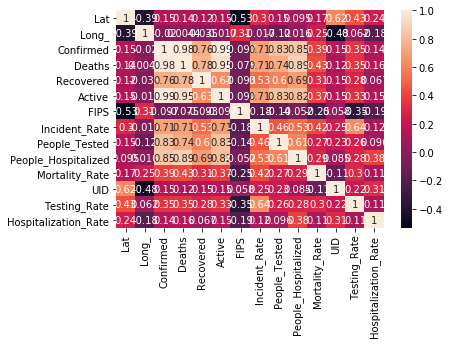

In [1005]:
sns.heatmap(ds.corr(), annot=True)

# Plotting outliers

Univariate Analysis

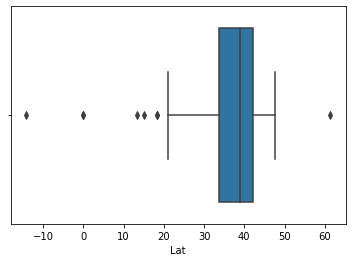

In [1006]:
sns.boxplot(ds['Lat'])

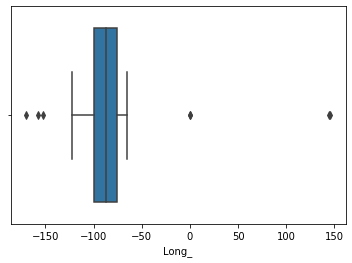

In [1007]:
sns.boxplot(ds['Long_'])

In [1008]:
collist = ['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']

In [1009]:
nrows = 12
ncols = 12

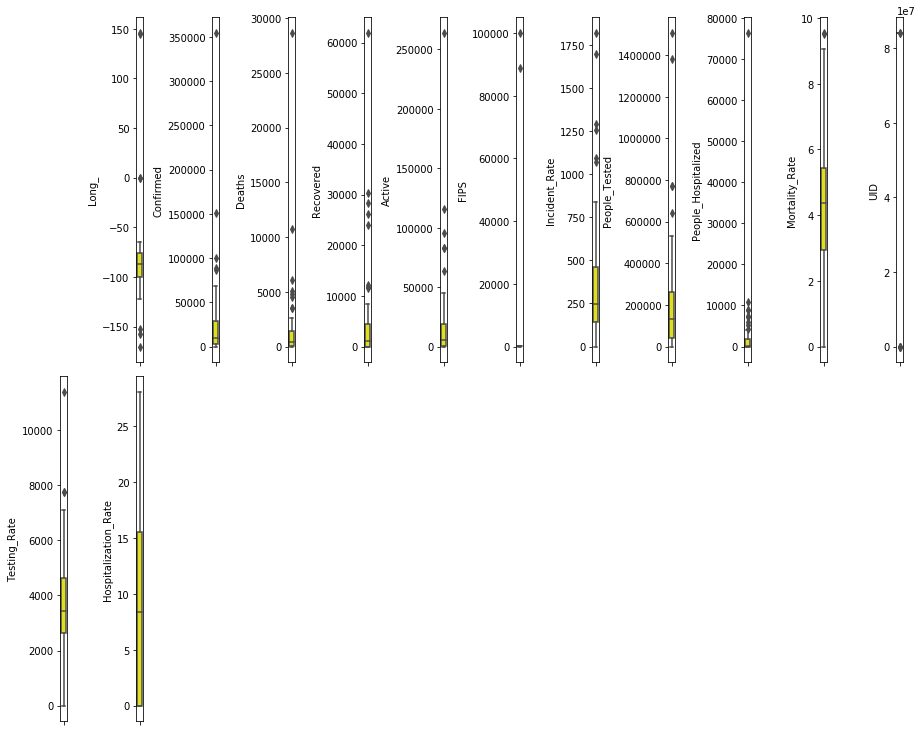

In [1010]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Checking the skewness of data by Distribution plots

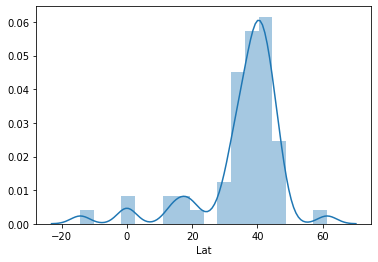

In [1011]:
sns.distplot(ds['Lat'])

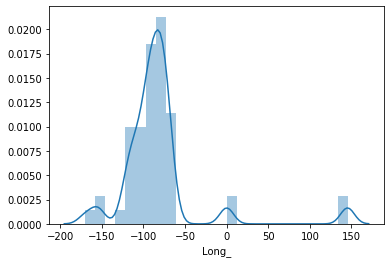

In [1012]:
sns.distplot(ds['Long_'])

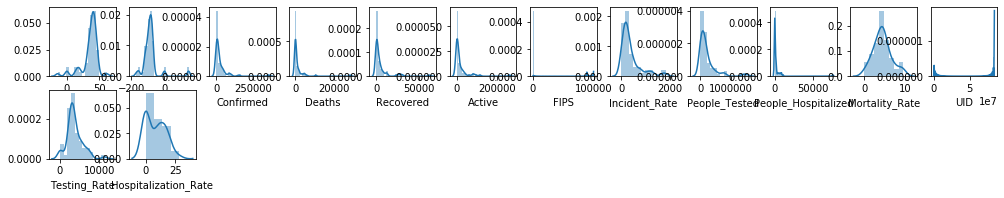

In [1013]:
plt.figure(figsize=(17, 18))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(ds[collist[i]])

From above plot, it looks like data is not normally distributed

(array([46.,  7.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([     0.,  35437.,  70874., 106311., 141748., 177185., 212622.,
        248059., 283496., 318933., 354370.]),
 <a list of 10 Patch objects>)

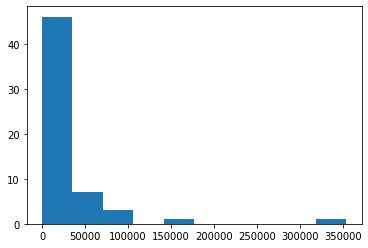

In [1014]:
plt.hist(ds['Confirmed'])

(array([50.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  2863.6,  5727.2,  8590.8, 11454.4, 14318. , 17181.6,
        20045.2, 22908.8, 25772.4, 28636. ]),
 <a list of 10 Patch objects>)

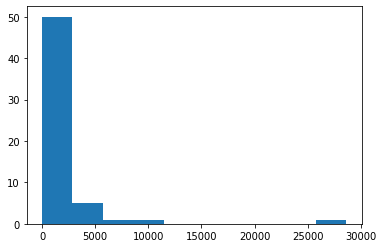

In [1015]:
plt.hist(ds['Deaths'])

(array([46.,  7.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  6188.6, 12377.2, 18565.8, 24754.4, 30943. , 37131.6,
        43320.2, 49508.8, 55697.4, 61886. ]),
 <a list of 10 Patch objects>)

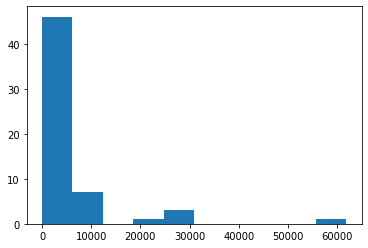

In [1016]:
plt.hist(ds['Recovered'])

(array([ 4.,  3., 21., 15.,  6.,  4.,  4.,  0.,  0.,  1.]),
 array([    0.        ,  1137.74246928,  2275.48493856,  3413.22740784,
         4550.96987712,  5688.71234641,  6826.45481569,  7964.19728497,
         9101.93975425, 10239.68222353, 11377.42469281]),
 <a list of 10 Patch objects>)

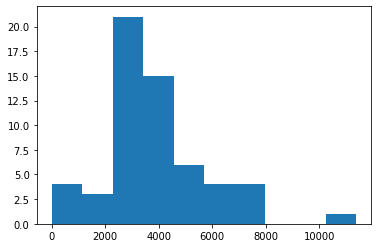

In [1017]:
plt.hist(ds['Testing_Rate'])

(array([25.,  0.,  4.,  7.,  6.,  5.,  8.,  1.,  1.,  1.]),
 array([ 0.        ,  2.80544378,  5.61088756,  8.41633134, 11.22177512,
        14.0272189 , 16.83266269, 19.63810647, 22.44355025, 25.24899403,
        28.05443781]),
 <a list of 10 Patch objects>)

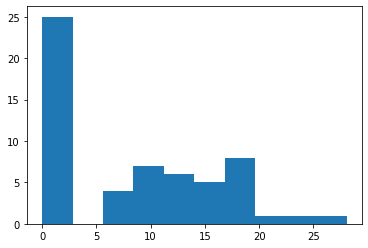

In [1018]:
plt.hist(ds['Hospitalization_Rate'])

# Bivariate Analysis

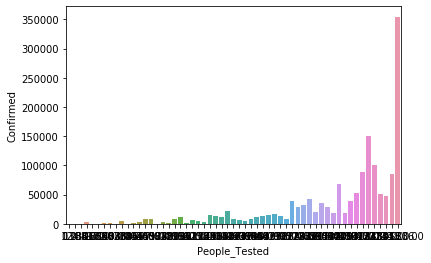

In [1019]:
sns.barplot(x='People_Tested', y='Confirmed', data=ds)

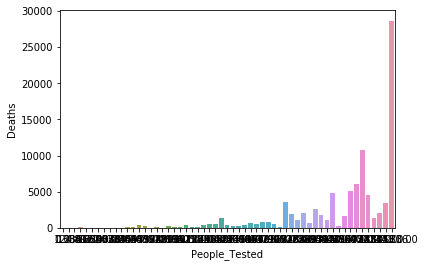

In [1020]:
sns.barplot(x='People_Tested', y='Deaths', data=ds)

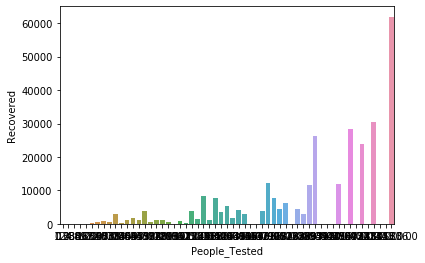

In [1021]:
sns.barplot(x='People_Tested', y='Recovered', data=ds)

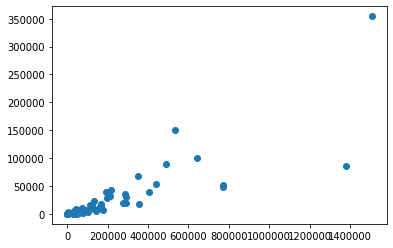

In [1022]:
plt.scatter(ds['People_Tested'], ds['Confirmed'])
plt.show()

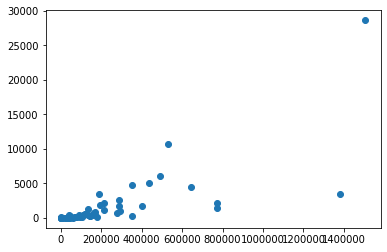

In [1023]:
plt.scatter(ds['People_Tested'], ds['Deaths'])
plt.show()

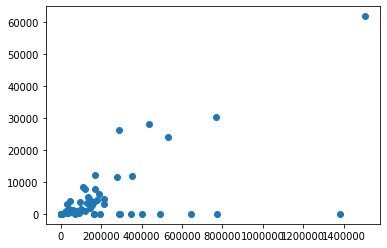

In [1024]:
plt.scatter(ds['People_Tested'], ds['Recovered'])
plt.show()

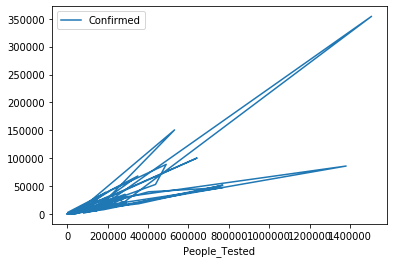

In [1025]:
ds.plot(x='People_Tested', y='Confirmed', kind='line')
plt.show()

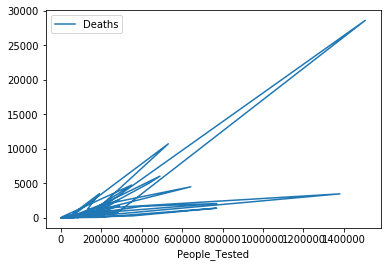

In [1026]:
ds.plot(x='People_Tested', y='Deaths', kind='line')
plt.show()

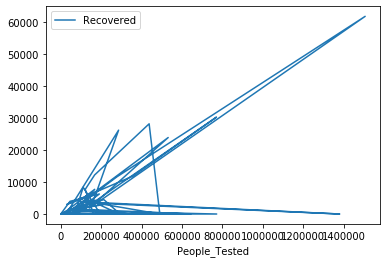

In [1027]:
ds.plot(x='People_Tested', y='Recovered', kind='line')
plt.show()

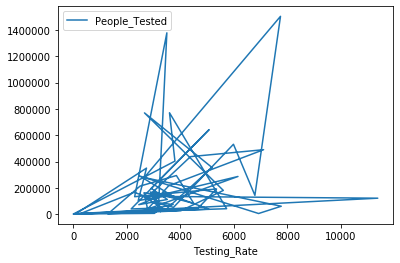

In [1028]:
ds.plot(x='Testing_Rate', y='People_Tested', kind='line')
plt.show()

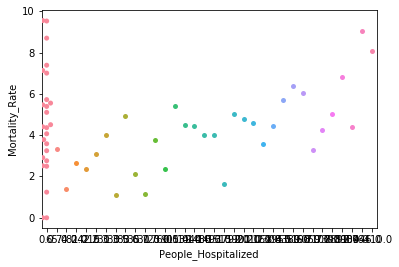

In [1029]:
sns.swarmplot(x='People_Hospitalized', y='Mortality_Rate', data=ds)

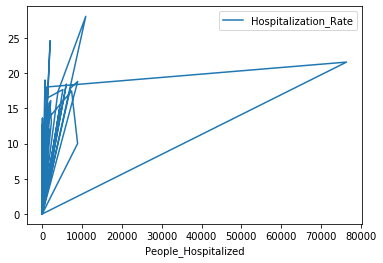

In [1030]:
ds.plot(x='People_Hospitalized', y='Hospitalization_Rate', kind='line')
plt.show()

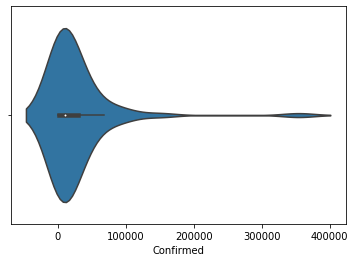

In [1031]:
sns.violinplot(ds['Confirmed'])

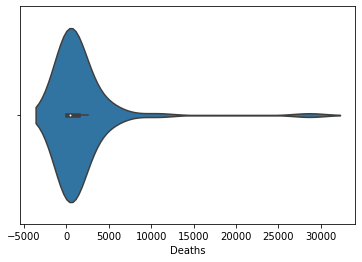

In [1032]:
sns.violinplot(ds['Deaths'])

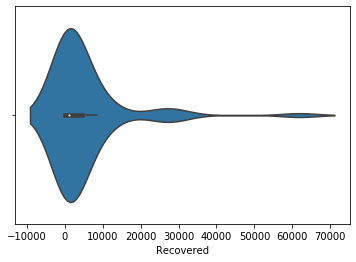

In [1033]:
sns.violinplot(ds['Recovered'])

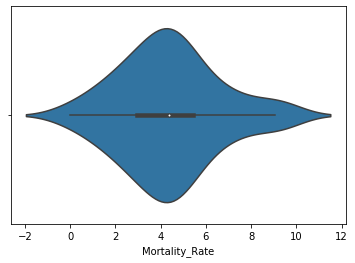

In [1034]:
sns.violinplot(ds['Mortality_Rate'])

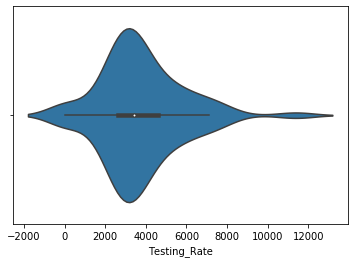

In [1035]:
sns.violinplot(ds['Testing_Rate'])

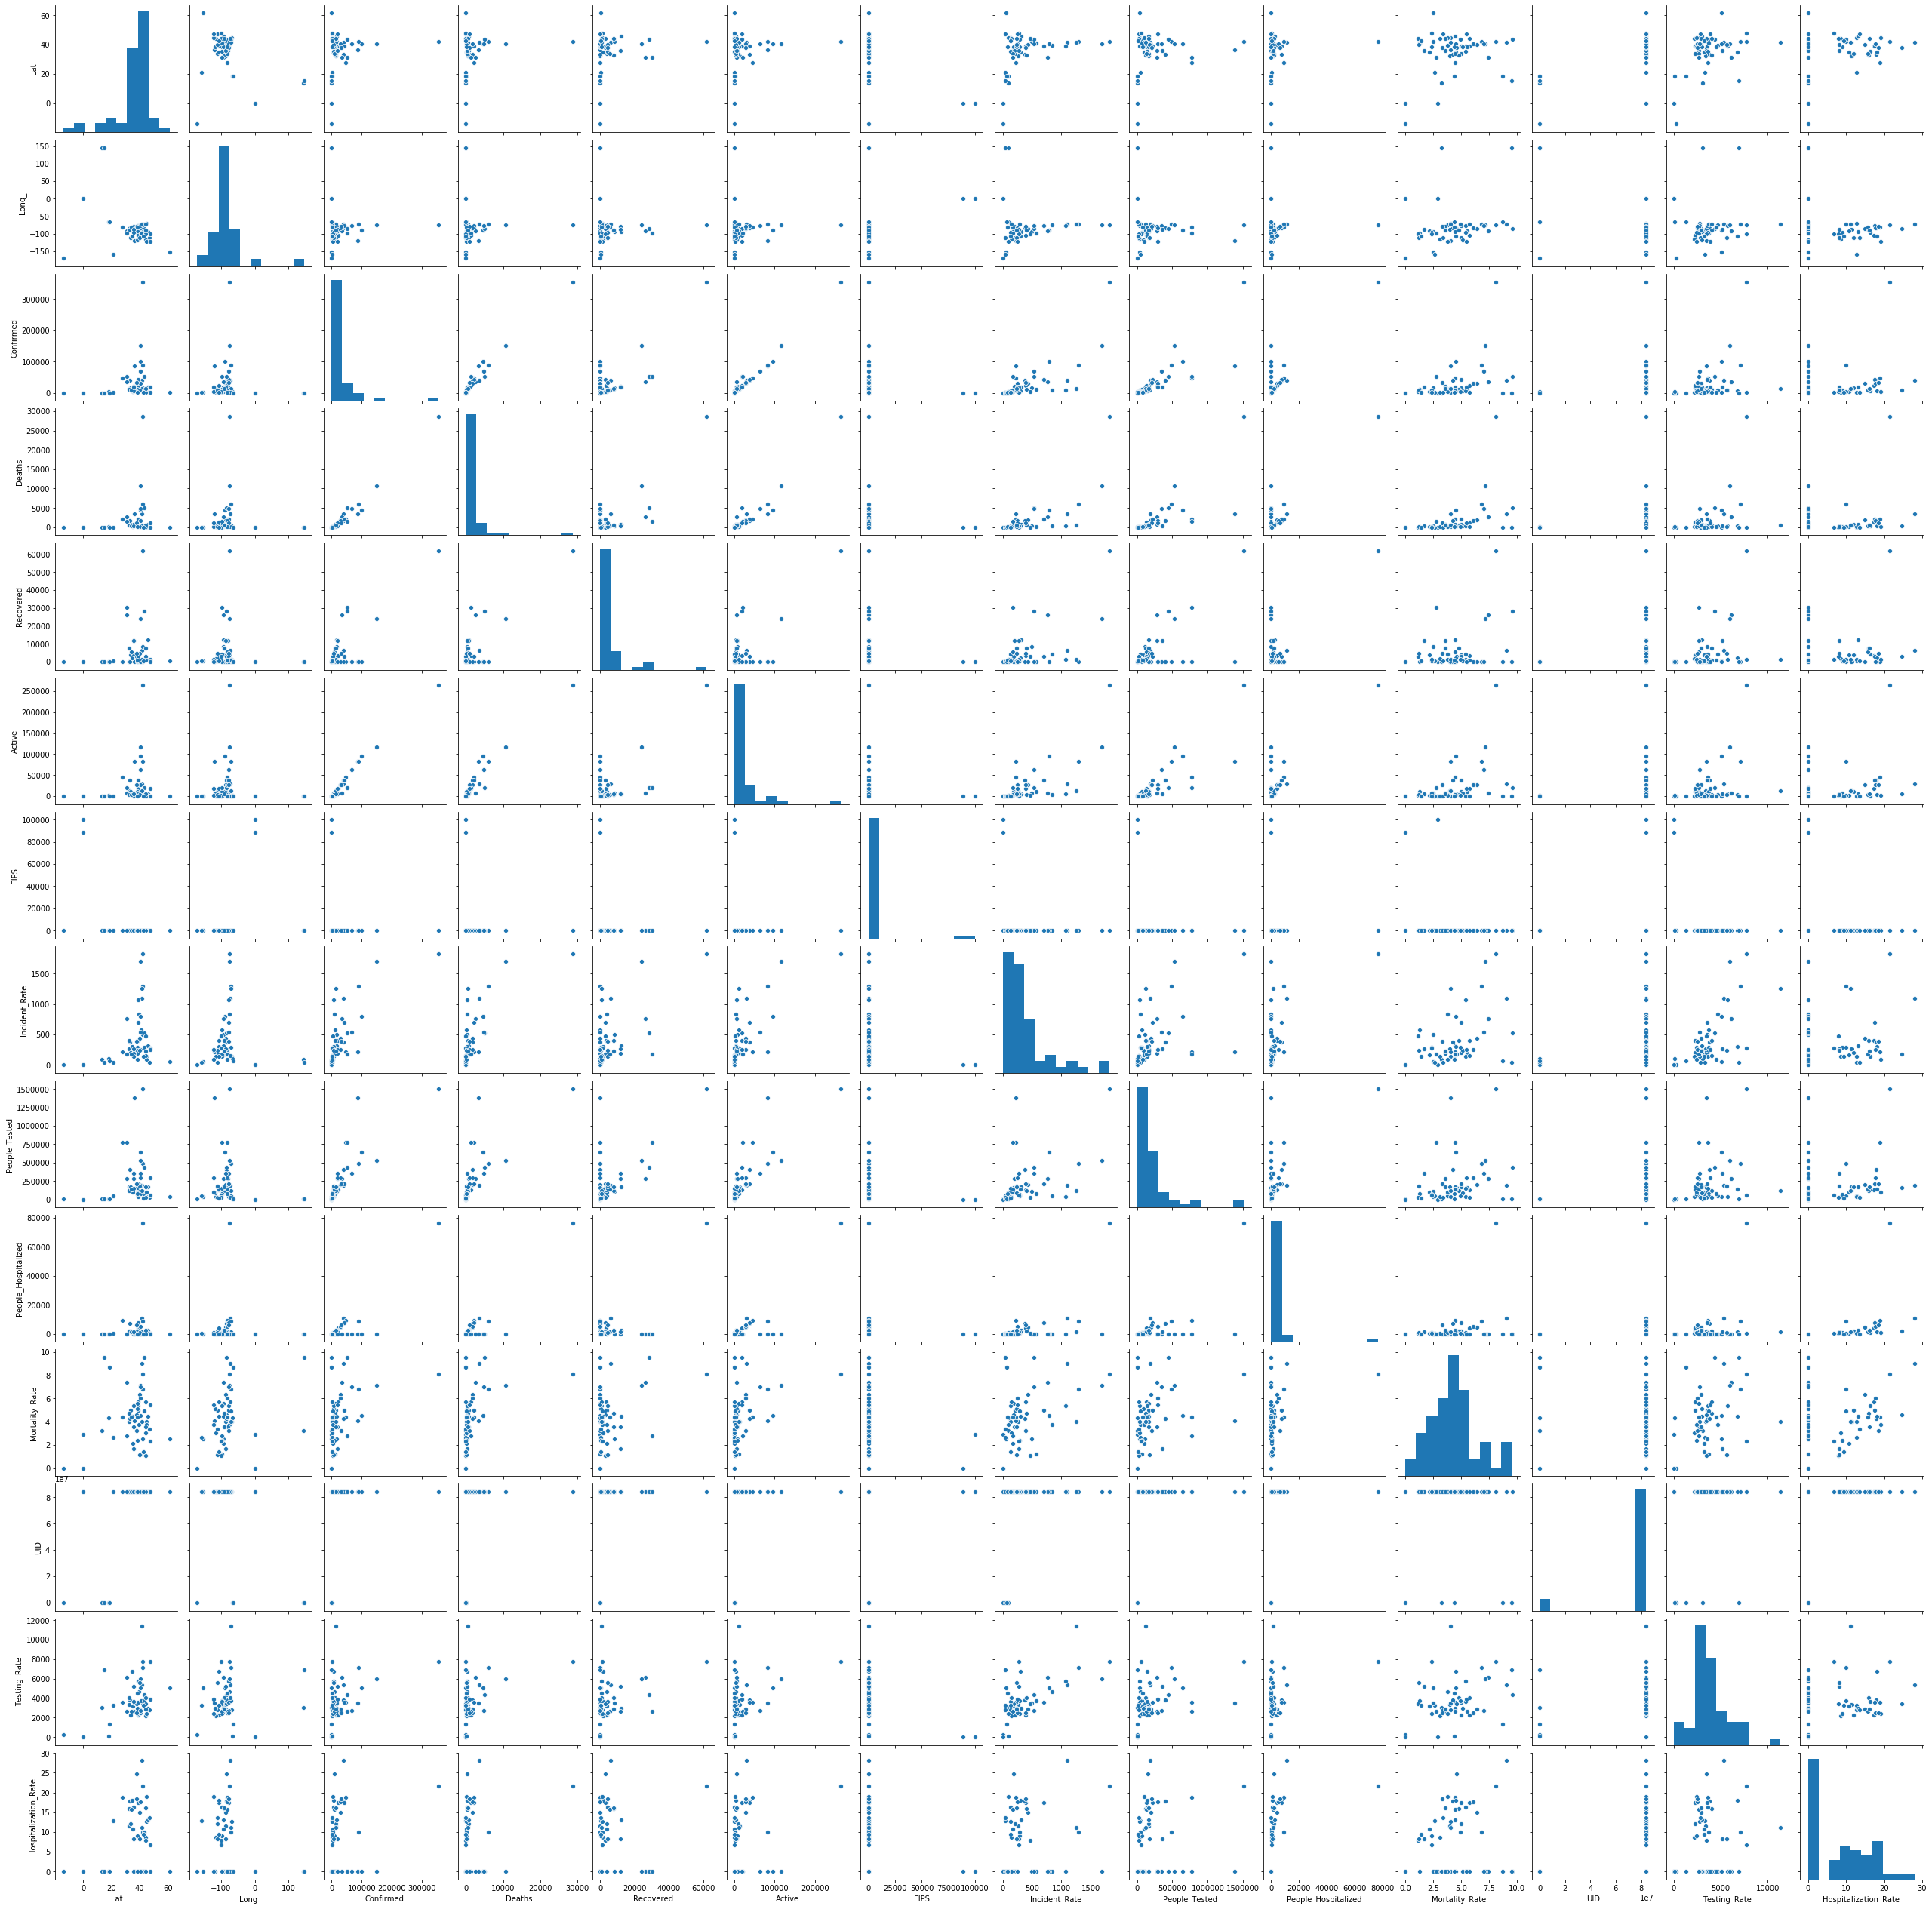

In [1036]:
sns.pairplot(ds)
plt.show()

In [1037]:
ds.dtypes

Province_State           object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [1038]:
# labelEncoder is used to convert category data to number data

le = LabelEncoder()
ds['Province_State'] = le.fit_transform(ds['Province_State'])
ds['ISO3'] = le.fit_transform(ds['ISO3'])

In [1039]:
ds.dtypes

Province_State            int32
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [1040]:
# Checking the skewness of data
ds.skew()

Province_State          0.000000
Lat                    -1.937509
Long_                   3.068318
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.961954
People_Tested           2.812214
People_Hospitalized     6.885993
Mortality_Rate          0.400879
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.024775
Hospitalization_Rate    0.407078
dtype: float64

In [1041]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it

from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (58, 16)
After removing zscore:  (47, 16)


# Regression for Recovered cases

In [1042]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Recovered'])
y = ds_final['Recovered']

In [1043]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [1044]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               1.849613
Deaths                  2.001798
Active                  2.379176
FIPS                    0.042193
Incident_Rate           1.593314
People_Tested           1.788602
People_Hospitalized     1.867724
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate            1.196266
Hospitalization_Rate    0.172820
dtype: float64

In [1045]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [1046]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               0.128370
Deaths                  0.816853
Active                  0.859181
FIPS                    0.042193
Incident_Rate          -0.617947
People_Tested          -0.439793
People_Hospitalized     0.984364
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate           -1.642882
Hospitalization_Rate    0.172820
dtype: float64

In [1047]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [1048]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               0.128370
Deaths                 -2.083756
Active                 -0.403644
FIPS                    0.042193
Incident_Rate          -0.617947
People_Tested          -0.439793
People_Hospitalized    -0.948591
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate           -1.642882
Hospitalization_Rate    0.172820
dtype: float64

In [1049]:
x.replace(np.NaN, 0, inplace=True)

In [1050]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [1051]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  51  is:  0.466859495155832


In [1052]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 27}

In [1053]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =27)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  68  is:  0.07652096263608099


In [1054]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  -2.4468915349244544
Standard deviation for r2 score in linear regression:  4.229244055114315

*****************

Mean r2 score for KNN regression:  -0.6068235697784665
Standard deviation for r2 score in KNN regression:  1.1230329531024592


In [1055]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso, Ridge
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 1}

In [1056]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=1)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  51  is:  0.5015510005239756


In [1057]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  -2.4325426969429844
Standard deviation in  r2 score for Lasso Regression:  4.2132906989750865


In [1058]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [1059]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=10)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  -0.38612909587252486
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.6234551375203617


In [1060]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  56  is:  0.002717775475807427


In [1061]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor(), Ridge()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [1062]:
ada_reg = AdaBoostRegressor(base_estimator = Ridge(), learning_rate=0.01, n_estimators=10)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  -1.9652136874845794
Standard Deviation in  r2 score for Ada Boosting Regression:  3.045656261062136


In [1063]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  57  is:  0.39487760830131635


In [1064]:
# we tried all the models and till now AdaBoost Regression is the best
# random state corresponding to highest r2 score is 82

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=68, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = Ridge(), learning_rate=0.01, n_estimators=10)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[ 8282.70284775  3268.09105297  6830.2345843   1464.52351536
 -1947.06960611   915.82865758  3171.50010555  2784.11986758
    61.00414863   303.43680522]


In [1065]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_covid_r.csv')

In [1066]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  6212.4880627204575
r2 score is:  0.29845261406363965


In [1067]:
print ("\n Score: ", ada_reg.score(x_train, y_train))


 Score:  0.31691043915411365


# Regression for Death cases

In [1068]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Deaths'])
y = ds_final['Deaths']

In [1069]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [1070]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               1.849613
Recovered               2.588811
Active                  2.379176
FIPS                    0.042193
Incident_Rate           1.593314
People_Tested           1.788602
People_Hospitalized     1.867724
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate            1.196266
Hospitalization_Rate    0.172820
dtype: float64

In [1071]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [1072]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               0.128370
Recovered               1.096005
Active                  0.859181
FIPS                    0.042193
Incident_Rate          -0.617947
People_Tested          -0.439793
People_Hospitalized     0.984364
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate           -1.642882
Hospitalization_Rate    0.172820
dtype: float64

In [1073]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [1074]:
x.skew()

Province_State          0.028786
Lat                     0.255334
Long_                  -1.449041
Confirmed               0.128370
Recovered              -0.719587
Active                 -0.403644
FIPS                    0.042193
Incident_Rate          -0.617947
People_Tested          -0.439793
People_Hospitalized    -0.948591
Mortality_Rate          0.528123
UID                     0.042193
ISO3                    0.000000
Testing_Rate           -1.642882
Hospitalization_Rate    0.172820
dtype: float64

In [1075]:
x.replace(np.NaN, 0, inplace=True)

In [1076]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  94  is:  0.9628177915478033


In [1077]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 24}

In [1078]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =24)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  72  is:  0.7504884106756013


In [1079]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.1500213439792641
Standard deviation for r2 score in linear regression:  0.9868749439567203

*****************

Mean r2 score for KNN regression:  0.26115345027047704
Standard deviation for r2 score in KNN regression:  0.11845402339448263


In [1080]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso, Ridge
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 0.01}

In [1081]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.01)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  94  is:  0.9561908357239338


In [1082]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.12256094147172983
Standard deviation in  r2 score for Lasso Regression:  1.000796356338455


In [1083]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [1084]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.17245353543410094
Standard Deviation in  r2 score for Gradient Boosting Regression:  1.2926194976903966


In [1085]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  96  is:  0.9900255894905123


In [1086]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor(), Ridge()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 10}

In [1087]:
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=0.001, n_estimators=10)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.5376481362594989
Standard Deviation in  r2 score for Ada Boosting Regression:  0.42127565077815826


In [1088]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  95  is:  0.9851475591878025


In [1089]:
# we tried all the models and till now Lasso Regression is the best
# random state corresponding to highest r2 score is 82

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=96, test_size = 0.20)
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100)
gbr.fit(x_train, y_train)
y_pred =  gbr.predict(x_test)
print (y_pred)

[ 517.41966883  517.41966883  577.55930425  713.58796438  724.17551635
 3597.32648172  493.66001541 1380.33691293  493.66001541  528.00722081]


In [1090]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_covid_d.csv')

In [1091]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  515.5548176463277
r2 score is:  0.8655192479036935


In [1092]:
print ("\n Score: ", ada_reg.score(x_train, y_train))


 Score:  0.8855900123867467


In [1093]:
from sklearn.externals import joblib
joblib.dump(gbr, 'Project_Covid.pkl')
#clf = joblib.load('Project_Covid.pkl')
#clf.predict(x_test)

['Project_Covid.pkl']